In [2]:
#Importing needed library
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os
import zipfile
%matplotlib inline

In [16]:
validation_dir='dataset/train-valid/validation'
validation_paper=os.listdir(validation_dir+"/paper")
validation_rock=os.listdir(validation_dir+"/rock")
validation_scissors=os.listdir(validation_dir+"/scissors")


train_dir='dataset/train-valid/train'
train_paper=os.listdir(train_dir+"/paper")
train_rock=os.listdir(train_dir+"/rock")
train_scissors=os.listdir(train_dir+"/scissors")

# Data set details

In [20]:
print("Training data ")

print("Paper training items :",len(train_paper))
print("Rock training items :",len(train_rock))
print("Scissors training items :",len(train_scissors),"\n\n")

print("Validation data ")

print("Paper validation items :",len(validation_paper))
print("Rock validation items :",len(validation_rock))
print("Scissors validation items :",len(validation_scissors))

Training data 
Paper training items : 840
Rock training items : 840
Scissors training items : 840 


Validation data 
Paper validation items : 124
Rock validation items : 124
Scissors validation items : 124


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
training_datagen=ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=40,
                    )

validation_datagen=ImageDataGenerator(
                    rescale=1./255)

In [36]:
validation_dir='dataset/train-valid/validation'
train_dir='dataset/train-valid/train'

In [63]:
train_generator=training_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150,150),
                    class_mode='categorical')


validation_generator=validation_datagen.flow_from_directory(
                    validation_dir,
                    target_size=(150,150),
                    class_mode='categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [64]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(2,2),activation='relu',input_shape=(150,150,3)),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                  
                                tf.keras.layers.Conv2D(32,(2,2),activation='relu',input_shape=(150,150,3)),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                  
                                  
                                 tf.keras.layers.Conv2D(64,(2,2),activation='relu',input_shape=(150,150,3)),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                  
                                  
                                 tf.keras.layers.Conv2D(128,(2,2),activation='relu',input_shape=(150,150,3)),
                                 tf.keras.layers.MaxPooling2D(2,2),
                                  
                                  
                                  tf.keras.layers.Flatten(),
                                  tf.keras.layers(Dropout(0.5)),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  tf.keras.layers.Dense(3,activation='softmax')
                                 ])
model.summary()

In [65]:
from  tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

In [66]:
history=model.fit_generator(train_generator,validation_data=validation_generator,epochs=10,verbose=2)
model.save('model.h5')

Epoch 1/10
79/79 - 64s - loss: 0.7212 - accuracy: 0.6726 - val_loss: 0.4260 - val_accuracy: 0.8414
Epoch 2/10
79/79 - 62s - loss: 0.2091 - accuracy: 0.9290 - val_loss: 0.9466 - val_accuracy: 0.6747
Epoch 3/10
79/79 - 65s - loss: 0.1055 - accuracy: 0.9671 - val_loss: 0.5674 - val_accuracy: 0.7957
Epoch 4/10
79/79 - 78s - loss: 0.0953 - accuracy: 0.9758 - val_loss: 0.2690 - val_accuracy: 0.8817
Epoch 5/10
79/79 - 71s - loss: 0.1324 - accuracy: 0.9790 - val_loss: 0.2008 - val_accuracy: 0.9059
Epoch 6/10
79/79 - 68s - loss: 0.0260 - accuracy: 0.9913 - val_loss: 0.7031 - val_accuracy: 0.7957
Epoch 7/10
79/79 - 68s - loss: 0.0185 - accuracy: 0.9937 - val_loss: 0.3410 - val_accuracy: 0.8952
Epoch 8/10
79/79 - 65s - loss: 0.0546 - accuracy: 0.9877 - val_loss: 0.3602 - val_accuracy: 0.8898
Epoch 9/10
79/79 - 68s - loss: 0.0115 - accuracy: 0.9960 - val_loss: 0.2265 - val_accuracy: 0.9194
Epoch 10/10
79/79 - 62s - loss: 0.0236 - accuracy: 0.9948 - val_loss: 0.2472 - val_accuracy: 0.9140


# Accuracy


<Figure size 432x288 with 0 Axes>

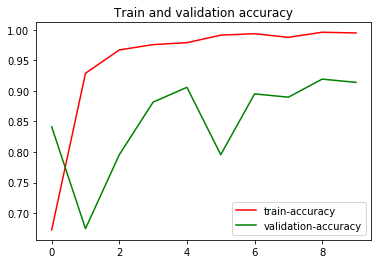

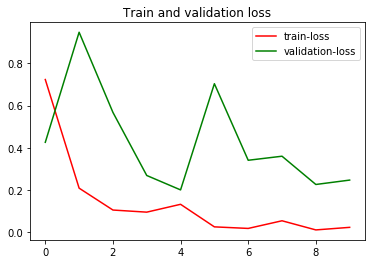

<Figure size 432x288 with 0 Axes>

In [69]:
validation_accuracy=history.history['val_accuracy']
train_accuracy=history.history['accuracy']

validation_loss=history.history['val_loss']
train_loss=history.history['loss']

epochs=range(len(train_accuracy))

plt.plot(epochs,train_accuracy,'r',label='train-accuracy')
plt.plot(epochs,validation_accuracy,'g',label='validation-accuracy')
plt.title("Train and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs,train_loss,'r',label='train-loss')
plt.plot(epochs,validation_loss,'g',label='validation-loss')
plt.title("Train and validation loss")
plt.legend()
plt.figure()